# GLOBAL ELECTRICITY CONSUMPTION

<img src="https://www.repsol.com/content/dam/repsol-corporate/es/energia-e-innovacion/consumo-energetico-cabecera.jpg" width="1000" height="600">

## About Dataset

This dataset contains the Yearly data from 1980 to 2021 on world electricity statistics. The dataset has total of 4 features and details of each feature is given below (All the information is in the billion kWh and million kW).


---
Electricity Activities/Transactions:

* Net Generation (billion kWh): Electricity generation/production
* Net Consumption (billion kWh): Electricity consumption
* Imports (billion kWh): Electricity imports
* Exports (billion kWh): Electricity exports
* Net Imports (billion kWh): Electricity net imports
* Installed Capacity (million kW): The maximum amount of electricity that a generating station (also known as a power plant) can produce under specific conditions designated by the manufacturer
* Distribution Losses (billion kWh): Transmission and distribution losses refer to the losses that occur in transmission of electricity between the sources of supply and points of distribution.

Potential Use Case:

* Time series analysis: Time series analysis to find the different patterns in electricity production, consumption, imports, exports and etc.
* Time series forecasting: Time series forecasting to predict the electricity production and consumption in future.
* Capacity: Find the current statistics of capacity of power plants and forecast the future values.
* Reduce Electricity Losses: Analyzing patterns of distribution losses and finding methods to reduce that

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import time

## Reading the dataframe

In [2]:
file = zipfile.ZipFile('../archive (1).zip')

In [3]:
for i in file.filelist:
    print(i.filename)

Global Electricity Statistics.csv


In [4]:
with file.open('Global Electricity Statistics.csv') as f:
    df = pd.read_csv(f)
    
df.head()

,Country,Features,Region,1980,1981,1982,1983,1984,1985,1986,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Algeria,net generation,Africa,6.683,7.65,8.824,9.615,10.537,11.569,12.214,...,53.9845,56.3134,60.39972,64.68244,66.75504,71.49546,72.10903,76.685,72.73591277,77.53072719
1,Angola,net generation,Africa,0.905,0.906,0.995,1.028,1.028,1.028,1.088,...,6.03408,7.97606,9.21666,9.30914,10.203511,10.67604,12.83194,15.4,16.6,16.429392
2,Benin,net generation,Africa,0.005,0.005,0.005,0.005,0.005,0.005,0.005,...,0.04612,0.08848,0.22666,0.31056,0.26004,0.3115,0.19028,0.2017,0.22608,0.24109728
3,Botswana,net generation,Africa,0.443,0.502,0.489,0.434,0.445,0.456,0.538,...,0.33,0.86868,2.17628,2.79104,2.52984,2.8438,2.97076,3.0469,2.05144,2.18234816
4,Burkina Faso,net generation,Africa,0.098,0.108,0.115,0.117,0.113,0.115,0.122,...,0.86834,0.98268,1.11808,1.43986,1.5509,1.64602,1.6464,1.72552,1.647133174,1.761209666


In [5]:
print('The dataframe contains {} rows and {} columns'.format(df.shape[0], df.shape[1]))

The dataframe contains 1610 rows and 45 columns


## Cleaning and preprocessing the data

The df contains yearly values for each country in seperated columns. This is hard to analyse data, because of this we will convert these columns into rows, by melting the df. So, firstly we are preprocessing our df in the wanted format. 

In [6]:
# Specifying the columns we want to keep as is (not melt)
non_melt_columns = ['Country', 'Features', 'Region']

df_processed = pd.melt(df, id_vars=non_melt_columns, var_name='Year', value_name='Value')
df_processed

,Country,Features,Region,Year,Value
0,Algeria,net generation,Africa,1980,6.683
1,Angola,net generation,Africa,1980,0.905
2,Benin,net generation,Africa,1980,0.005
3,Botswana,net generation,Africa,1980,0.443
4,Burkina Faso,net generation,Africa,1980,0.098
...,...,...,...,...,...
67615,Trinidad and Tobago,distribution losses,Central & South America,2021,0.422757
67616,Turks and Caicos Islands,distribution losses,Central & South America,2021,0.01277172
67617,U.S. Virgin Islands,distribution losses,Central & South America,2021,0.051
67618,Uruguay,distribution losses,Central & South America,2021,1.129273


In [7]:
# Checking the 'Features' column

print(df_processed['Features'].unique())

['net generation' 'net consumption' 'imports ' 'exports ' 'net imports '
 'installed capacity ' 'distribution losses ']


In [8]:
# Correcting features by standard names

feature_mapping = {
    'net generation': 'Net Generation [TWh]',
    'net consumption': 'Net Consumption [TWh]',
    'imports ': 'Imports [TWh]',
    'exports ': 'Exports [TWh]',
    'net imports ': 'Net Imports [TWh]',
    'installed capacity ': 'Installed Capacity [GW]',
    'distribution losses ': 'Distribution Losses [TWh]',
}

In [9]:
# Replacing 'Features' by more standardized names as created above

df_processed['Features'] = df_processed['Features'].replace(feature_mapping)

In [10]:
df_processed.head()

,Country,Features,Region,Year,Value
0,Algeria,Net Generation [TWh],Africa,1980,6.683
1,Angola,Net Generation [TWh],Africa,1980,0.905
2,Benin,Net Generation [TWh],Africa,1980,0.005
3,Botswana,Net Generation [TWh],Africa,1980,0.443
4,Burkina Faso,Net Generation [TWh],Africa,1980,0.098


In [11]:
# Pivoting values by 'Features' column (Creating a column for each feature value)

df_processed_final = df_processed.pivot(index=['Country', 'Region', 'Year'], columns='Features', values='Value').reset_index().copy()
df_processed_final

Features,Country,Region,Year,Distribution Losses [TWh],Exports [TWh],Imports [TWh],Installed Capacity [GW],Net Consumption [TWh],Net Generation [TWh],Net Imports [TWh]
0,Afghanistan,Asia & Oceania,1980,0.06594,0,0,0.374,0.87606,0.942,0
1,Afghanistan,Asia & Oceania,1981,0.06944,0,0,0.427,0.92256,0.992,0
2,Afghanistan,Asia & Oceania,1982,0.06664,0,0,0.427,0.88536,0.952,0
3,Afghanistan,Asia & Oceania,1983,0.07,0,0,0.45,0.93,1,0
4,Afghanistan,Asia & Oceania,1984,0.07133,0,0,0.45,0.94767,1.019,0
...,...,...,...,...,...,...,...,...,...,...
9655,Zimbabwe,Africa,2017,1.728908,0.351,2.569,2.311252,7.838552,7.34946,2.218
9656,Zimbabwe,Africa,2018,1.747814,0.161,1.177,2.455607,8.455186,9.187,1.016
9657,Zimbabwe,Africa,2019,1.552412,0.504,1.612,2.461,7.786427,8.230839,1.108
9658,Zimbabwe,Africa,2020,1.444983,0.355,2.337,2.474,8.131026611,7.594009611,1.982


There may be leading or trailing whitespaces in the 'Country' column. Because of that we can eliminate them by:

In [12]:
df_processed_final['Country'] = df_processed_final['Country'].str.strip()

In [13]:
# Printing generalized df informations

df_processed_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9660 entries, 0 to 9659
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Country                    9660 non-null   object
 1   Region                     9660 non-null   object
 2   Year                       9660 non-null   object
 3   Distribution Losses [TWh]  9493 non-null   object
 4   Exports [TWh]              9493 non-null   object
 5   Imports [TWh]              9493 non-null   object
 6   Installed Capacity [GW]    9493 non-null   object
 7   Net Consumption [TWh]      9493 non-null   object
 8   Net Generation [TWh]       9493 non-null   object
 9   Net Imports [TWh]          9485 non-null   object
dtypes: object(10)
memory usage: 754.8+ KB


As it is seen above, in this df we have null values. Soo , before analyzing we will have to clean them.

In [14]:
# Printing sum of null values for each column

df_processed_final.isnull().sum()

Features
Country                        0
Region                         0
Year                           0
Distribution Losses [TWh]    167
Exports [TWh]                167
Imports [TWh]                167
Installed Capacity [GW]      167
Net Consumption [TWh]        167
Net Generation [TWh]         167
Net Imports [TWh]            175
dtype: int64

In [15]:
# Checking null values per each country

df_processed_final.loc[
                       (df_processed_final['Distribution Losses [TWh]'].isna()) | 
                       (df_processed_final['Exports [TWh]'].isna()) |
                       (df_processed_final['Imports [TWh]'].isna()) |
                       (df_processed_final['Installed Capacity [GW]'].isna()) |
                       (df_processed_final['Net Consumption [TWh]'].isna()) |
                       (df_processed_final['Net Generation [TWh]'].isna())
                      ].groupby(['Country']).size()

Country
Micronesia                  42
Northern Mariana Islands    41
Tuvalu                      42
U.S. Territories            42
dtype: int64

Since we have data only from 1980 to 2021 (42 years), we can drop all columns that are in one of the countries above, because all of their values are null!

In [16]:
# Specifying countries to drop from df
countries_to_drop = ['Micronesia', 'Northern Mariana Islands', 'Tuvalu', 'U.S. Territories']

# Droping rows of the selected countries
df_processed_final = df_processed_final[~df_processed_final['Country'].isin(countries_to_drop)].copy()

In [17]:
df_processed_final

Features,Country,Region,Year,Distribution Losses [TWh],Exports [TWh],Imports [TWh],Installed Capacity [GW],Net Consumption [TWh],Net Generation [TWh],Net Imports [TWh]
0,Afghanistan,Asia & Oceania,1980,0.06594,0,0,0.374,0.87606,0.942,0
1,Afghanistan,Asia & Oceania,1981,0.06944,0,0,0.427,0.92256,0.992,0
2,Afghanistan,Asia & Oceania,1982,0.06664,0,0,0.427,0.88536,0.952,0
3,Afghanistan,Asia & Oceania,1983,0.07,0,0,0.45,0.93,1,0
4,Afghanistan,Asia & Oceania,1984,0.07133,0,0,0.45,0.94767,1.019,0
...,...,...,...,...,...,...,...,...,...,...
9655,Zimbabwe,Africa,2017,1.728908,0.351,2.569,2.311252,7.838552,7.34946,2.218
9656,Zimbabwe,Africa,2018,1.747814,0.161,1.177,2.455607,8.455186,9.187,1.016
9657,Zimbabwe,Africa,2019,1.552412,0.504,1.612,2.461,7.786427,8.230839,1.108
9658,Zimbabwe,Africa,2020,1.444983,0.355,2.337,2.474,8.131026611,7.594009611,1.982


In [18]:
# Checking the 'Net Imports [TWh]' colum, null values

df_processed_final.loc[(df_processed_final['Net Imports [TWh]'].isna())].groupby(['Country']).size()

Country
French Guiana    1
Guadeloupe       2
Martinique       2
Reunion          2
dtype: int64

In [19]:
# Dropping rows that contain null value in 'Net Imports [TWh]' column

df_processed_final = df_processed_final.dropna(subset=['Net Imports [TWh]'])

In [20]:
# Checking again for null values

df_processed_final.isnull().sum()

Features
Country                      0
Region                       0
Year                         0
Distribution Losses [TWh]    0
Exports [TWh]                0
Imports [TWh]                0
Installed Capacity [GW]      0
Net Consumption [TWh]        0
Net Generation [TWh]         0
Net Imports [TWh]            0
dtype: int64

As it is seen in the df infos above, all of the df column are "Object", type. We will need to convert them to numerical values for further analysis.

In [23]:
# Specifying columns to convert to numeric values.
columns_to_convert = ['Year', 'Distribution Losses [TWh]', 'Exports [TWh]', 'Imports [TWh]',
                       'Installed Capacity [GW]', 'Net Consumption [TWh]',
                       'Net Generation [TWh]', 'Net Imports [TWh]']

# Converting selected columns to numeric - using errors='coerce' to set values that cannot be convertet to numerical(for example 'strings') as null values
df_processed_final[columns_to_convert] = df_processed_final[columns_to_convert].apply(pd.to_numeric, errors='coerce').copy() 

# Now the specified columns are of type float in the DataFrame
df_processed_final

C:\Users\Admin\AppData\Local\Temp\ipykernel_14040\2766494531.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_processed_final[columns_to_convert] = df_processed_final[columns_to_convert].apply(pd.to_numeric, errors='coerce').copy()


Features,Country,Region,Year,Distribution Losses [TWh],Exports [TWh],Imports [TWh],Installed Capacity [GW],Net Consumption [TWh],Net Generation [TWh],Net Imports [TWh]
0,Afghanistan,Asia & Oceania,1980,0.065940,0.000000,0.000000,0.374000,0.876060,0.942000,0.000000
1,Afghanistan,Asia & Oceania,1981,0.069440,0.000000,0.000000,0.427000,0.922560,0.992000,0.000000
2,Afghanistan,Asia & Oceania,1982,0.066640,0.000000,0.000000,0.427000,0.885360,0.952000,0.000000
3,Afghanistan,Asia & Oceania,1983,0.070000,0.000000,0.000000,0.450000,0.930000,1.000000,0.000000
4,Afghanistan,Asia & Oceania,1984,0.071330,0.000000,0.000000,0.450000,0.947670,1.019000,0.000000
...,...,...,...,...,...,...,...,...,...,...
9655,Zimbabwe,Africa,2017,1.728908,0.351000,2.569000,2.311252,7.838552,7.349460,2.218000
9656,Zimbabwe,Africa,2018,1.747814,0.161000,1.177000,2.455607,8.455186,9.187000,1.016000
9657,Zimbabwe,Africa,2019,1.552412,0.504000,1.612000,2.461000,7.786427,8.230839,1.108000
9658,Zimbabwe,Africa,2020,1.444983,0.355000,2.337000,2.474000,8.131027,7.594010,1.982000


In [24]:
# Checking for null values after column transformation

df_processed_final.isnull().sum()

Features
Country                        0
Region                         0
Year                           0
Distribution Losses [TWh]    694
Exports [TWh]                662
Imports [TWh]                661
Installed Capacity [GW]      694
Net Consumption [TWh]        661
Net Generation [TWh]         694
Net Imports [TWh]            661
dtype: int64

As it is seen above, we have more null values after column transformations. This is because in our df, there are lots of values that are strings, for example "--" ..<br>
We can drop all of these columns

In [25]:
# Dropping rows that contain null value in 'Net Imports [TWh]' df

df_processed_final = df_processed_final.dropna(subset=['Distribution Losses [TWh]', 'Exports [TWh]', 'Imports [TWh]',
                       'Installed Capacity [GW]', 'Net Consumption [TWh]',
                       'Net Generation [TWh]', 'Net Imports [TWh]'])
df_processed_final

Features,Country,Region,Year,Distribution Losses [TWh],Exports [TWh],Imports [TWh],Installed Capacity [GW],Net Consumption [TWh],Net Generation [TWh],Net Imports [TWh]
0,Afghanistan,Asia & Oceania,1980,0.065940,0.000000,0.000000,0.374000,0.876060,0.942000,0.000000
1,Afghanistan,Asia & Oceania,1981,0.069440,0.000000,0.000000,0.427000,0.922560,0.992000,0.000000
2,Afghanistan,Asia & Oceania,1982,0.066640,0.000000,0.000000,0.427000,0.885360,0.952000,0.000000
3,Afghanistan,Asia & Oceania,1983,0.070000,0.000000,0.000000,0.450000,0.930000,1.000000,0.000000
4,Afghanistan,Asia & Oceania,1984,0.071330,0.000000,0.000000,0.450000,0.947670,1.019000,0.000000
...,...,...,...,...,...,...,...,...,...,...
9655,Zimbabwe,Africa,2017,1.728908,0.351000,2.569000,2.311252,7.838552,7.349460,2.218000
9656,Zimbabwe,Africa,2018,1.747814,0.161000,1.177000,2.455607,8.455186,9.187000,1.016000
9657,Zimbabwe,Africa,2019,1.552412,0.504000,1.612000,2.461000,7.786427,8.230839,1.108000
9658,Zimbabwe,Africa,2020,1.444983,0.355000,2.337000,2.474000,8.131027,7.594010,1.982000


In [26]:
# Printing generalized df informations

df_processed_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8791 entries, 0 to 9659
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    8791 non-null   object 
 1   Region                     8791 non-null   object 
 2   Year                       8791 non-null   int64  
 3   Distribution Losses [TWh]  8791 non-null   float64
 4   Exports [TWh]              8791 non-null   float64
 5   Imports [TWh]              8791 non-null   float64
 6   Installed Capacity [GW]    8791 non-null   float64
 7   Net Consumption [TWh]      8791 non-null   float64
 8   Net Generation [TWh]       8791 non-null   float64
 9   Net Imports [TWh]          8791 non-null   float64
dtypes: float64(7), int64(1), object(2)
memory usage: 755.5+ KB


In [27]:
# Printing generalized df informations

df_processed_final.describe()

Features,Year,Distribution Losses [TWh],Exports [TWh],Imports [TWh],Installed Capacity [GW],Net Consumption [TWh],Net Generation [TWh],Net Imports [TWh]
count,8791.000000,8791.00000,8791.000000,8791.000000,8791.000000,8791.000000,8791.000000,8791.000000
mean,2000.949835,6.46912,2.287875,2.305683,19.645010,70.170680,76.621992,0.017808
std,12.002298,25.25975,7.834608,6.671087,94.982118,344.628336,367.048417,7.500704
min,1980.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,-77.034000
25%,1991.000000,0.03031,0.000000,0.000000,0.132000,0.369949,0.372170,0.000000
50%,2001.000000,0.50200,0.000000,0.000000,1.141000,3.486000,3.907700,0.000000
75%,2011.000000,3.12350,0.446500,0.745814,8.539500,27.807310,31.412900,0.071000
max,2021.000000,335.17100,85.289998,75.770469,2355.550000,7805.656341,8151.518231,66.670580


From the above description of the df we se that 'Distribution Losses [TWh]', 'Net Consumption [TWh]', 'Net Generation [TWh]' have zero values. In a real word scenario, these cannot be equal to zero. Since we do not have any other data, we can consider them as not correct! <br>

We will fill zero "Distribution Losses [TWh]" with country average losses only if "Net Consumption [TWh]" is higher than zero in that row. If "Net Consumption [TWh]" is 0 then we will not replace these values.

In [28]:
# Creating a mast to specify which countries have zero 'Distribution Losses [TWh]' and 'Net Consumption [TWh]' not as zero

mask_countries_to_check = df_processed_final.loc[(df_processed_final['Distribution Losses [TWh]'] == 0) & 
                                                 (df_processed_final['Net Consumption [TWh]'] > 0)
                                                ]['Country'].unique().tolist()


# Calculating average 'Distribution Losses [TWh]' for these countries (Excluding rows with 'Net Consumption [TWh]')

average_losses_by_country = df_processed_final.loc[
                                                   (df_processed_final['Country'].isin(mask_countries_to_check)) & 
                                                   (df_processed_final['Distribution Losses [TWh]'] > 0)
                                                  ].groupby('Country')['Distribution Losses [TWh]'].mean()

# Function to replace zeros with the average for each country
def replace_zeros(row):
    if row['Distribution Losses [TWh]'] == 0 and row['Net Consumption [TWh]'] > 0:
        country = row['Country']
        if country in average_losses_by_country:
            return average_losses_by_country[country]
    return row['Distribution Losses [TWh]']

# Replacing zero values of 'Distribution Losses [TWh]' with country averages
df_processed_final['Distribution Losses [TWh]'] = df_processed_final.apply(replace_zeros, axis=1)

C:\Users\Admin\AppData\Local\Temp\ipykernel_14040\1703644989.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_processed_final['Distribution Losses [TWh]'] = df_processed_final.apply(replace_zeros, axis=1)


In [39]:
# The final processed and cleaned df:

df_processed_final

Features,Country,Region,Year,Distribution Losses [TWh],Exports [TWh],Imports [TWh],Installed Capacity [GW],Net Consumption [TWh],Net Generation [TWh],Net Imports [TWh]
0,Afghanistan,Asia & Oceania,1980,0.065940,0.000000,0.000000,0.374000,0.876060,0.942000,0.000000
1,Afghanistan,Asia & Oceania,1981,0.069440,0.000000,0.000000,0.427000,0.922560,0.992000,0.000000
2,Afghanistan,Asia & Oceania,1982,0.066640,0.000000,0.000000,0.427000,0.885360,0.952000,0.000000
3,Afghanistan,Asia & Oceania,1983,0.070000,0.000000,0.000000,0.450000,0.930000,1.000000,0.000000
4,Afghanistan,Asia & Oceania,1984,0.071330,0.000000,0.000000,0.450000,0.947670,1.019000,0.000000
...,...,...,...,...,...,...,...,...,...,...
9655,Zimbabwe,Africa,2017,1.728908,0.351000,2.569000,2.311252,7.838552,7.349460,2.218000
9656,Zimbabwe,Africa,2018,1.747814,0.161000,1.177000,2.455607,8.455186,9.187000,1.016000
9657,Zimbabwe,Africa,2019,1.552412,0.504000,1.612000,2.461000,7.786427,8.230839,1.108000
9658,Zimbabwe,Africa,2020,1.444983,0.355000,2.337000,2.474000,8.131027,7.594010,1.982000


## Exploratory Data Analysis (EDA)

In [40]:
print('In this df we have {} countries'.format(len(df_processed_final['Country'].unique())))

In this df we have 226 countries


In [154]:
# Setting darkgrid for better visualizations

sns.set_style('dark')

### Annual Global Consumption

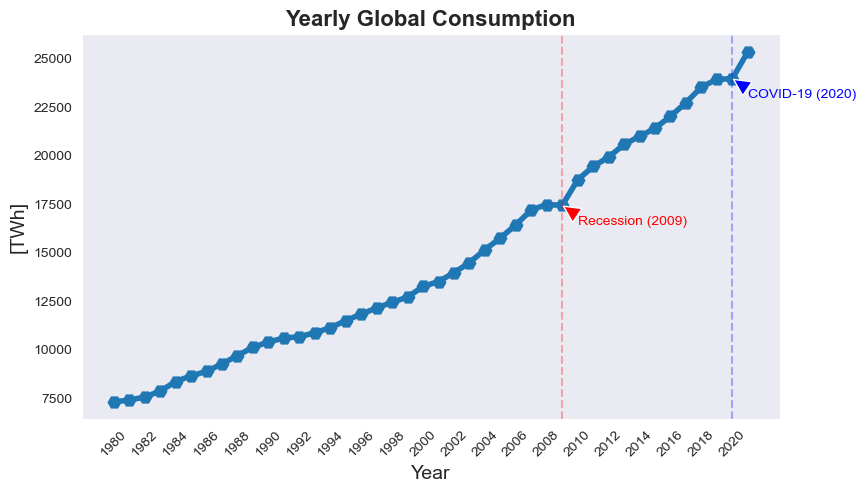

In [155]:

# Calculating yearly global consumption
global_consumption_yearly = df_processed_final.groupby('Year')['Net Consumption [TWh]'].sum()

# Plot for yearly global consumption
global_consumption_yearly.plot(kind='line', figsize=(9,5), lw=4, marker='H', ms=9)

# Adding annotations for recession in 2009
plt.annotate('Recession (2009)', xy=(2009, global_consumption_yearly.loc[2009]),
            xytext=(2009+1, global_consumption_yearly.loc[2009] - 1000),
            arrowprops=dict(facecolor='red', shrink=0.08),
            fontsize=10, color='red')

# Adding annotations for COVID-19 period in 2020
plt.annotate('COVID-19 (2020)', xy=(2020, global_consumption_yearly.loc[2020]),
            xytext=(2020+1, global_consumption_yearly.loc[2020] - 1000),
            arrowprops=dict(facecolor='blue', shrink=0.08),
            fontsize=10, color='blue')

# Adding lines to highlight recession in 2009 and COVID-19 period in 2020
plt.axvline(x=2009, color='red', linestyle='--', linewidth=2, label='Recession (2009)', lw=1.5, alpha=0.3)
plt.axvline(x=2020, color='blue', linestyle='--', linewidth=2, label='COVID-19 (2020)', lw=1.5, alpha=0.3)

# Additional formatting
plt.title('Yearly Global Consumption', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('[TWh]', fontsize=14)
plt.xticks(list(range(1980, 2021, 2)), rotation=45)

# Show the plot
plt.show()

### Annual Consumption by Region

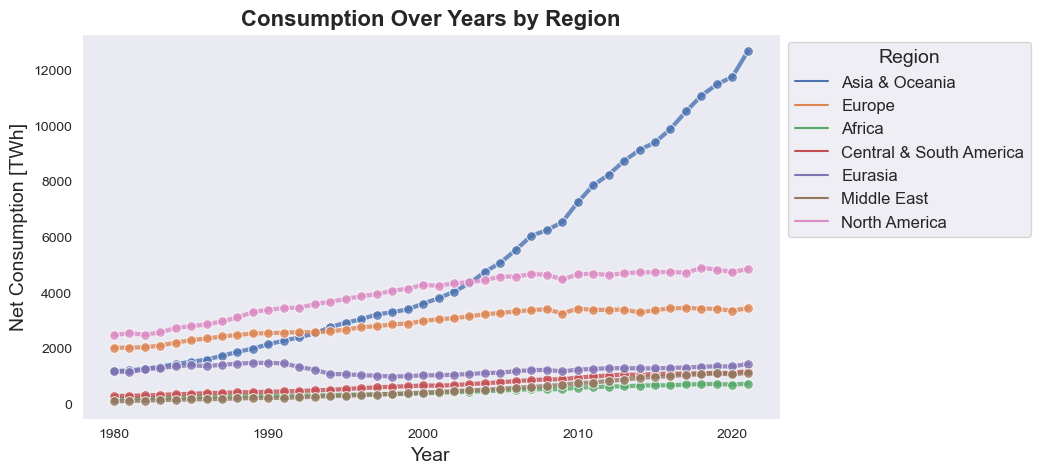

In [156]:
# Setting a custom color palette for the lines
custom_palette = sns.color_palette("deep", n_colors=len(df_processed_final['Region'].unique()))

# Setting the fig_size
fig, ax = plt.subplots(figsize=(9, 5))

# Plot for consumption over the years by region
sns.lineplot(
    data=df_processed_final,
    x='Year',
    y='Net Consumption [TWh]',
    hue='Region',
    estimator=sum,
    errorbar=None,  # No confidence interval shading
    palette=custom_palette,
    marker='o',  # Add markers at data points
    markersize=7,  # Adjust marker size
    linewidth=3,  # Line width
    alpha=0.8,  # Set transparency (alpha)
    ax=ax
)

# Adding a title and labels
plt.title('Consumption Over Years by Region', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Net Consumption [TWh]', fontsize=14)

# Customizing the legend
plt.legend(title='Region', title_fontsize='14', fontsize='12', loc='upper left', bbox_to_anchor=(1, 1))

# # Adding grid lines
# plt.grid(True, linestyle='--', alpha=0.7)

# # Adding a background color to the plot
# ax.set_facecolor('#f7f7f7')

# Show the plot
plt.show()


### Consumption ratio by region

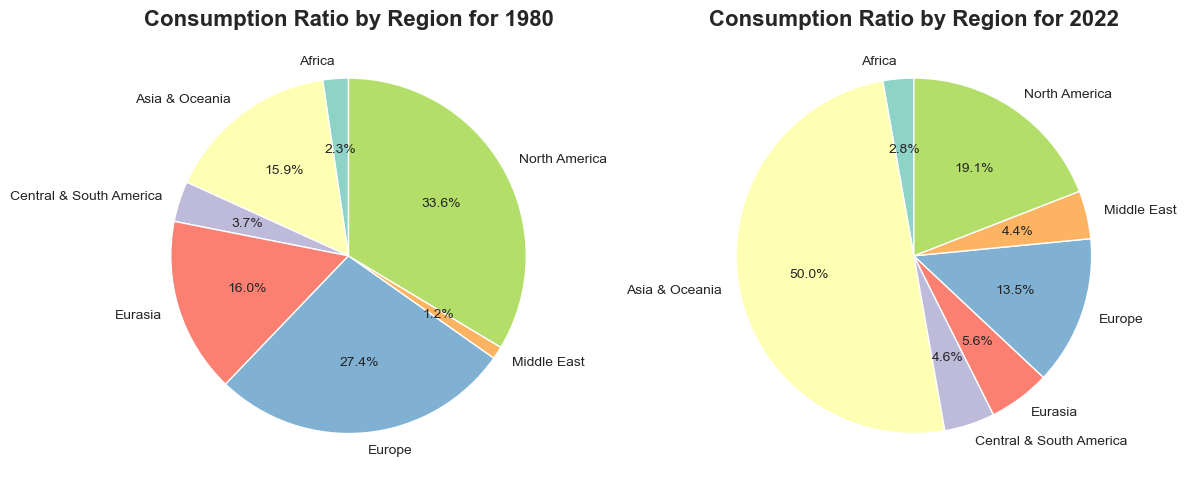

In [157]:

# Filtering data for the year 1980
df_1980 = df_processed_final[df_processed_final['Year'] == 1980].groupby('Region')['Net Consumption [TWh]'].sum().reset_index()
# Calculating the total consumption for 1980
total_consumption_1980 = df_1980['Net Consumption [TWh]'].sum()
# Calculating the consumption ratio based on region
df_1980['Consumption Ratio'] = df_1980['Net Consumption [TWh]'] / total_consumption_1980

# Filtering data for the year 2022
df_2022 = df_processed_final[df_processed_final['Year'] == 2021].groupby('Region')['Net Consumption [TWh]'].sum().reset_index()
# Calculating the total consumption for 2022
total_consumption_2022 = df_2022['Net Consumption [TWh]'].sum()
# Calculateing the consumption ratio based on region
df_2022['Consumption Ratio'] = (df_2022['Net Consumption [TWh]']) / total_consumption_2022


# Creating a 1 x 2 subplot
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plotting the pie chart for 1980
axs[0].pie(df_1980['Consumption Ratio'], labels=df_1980['Region'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3'))
axs[0].set_title('Consumption Ratio by Region for 1980', fontsize=16, fontweight='bold')

# Plotting the pie chart for 2022
axs[1].pie(df_2022['Consumption Ratio'], labels=df_2022['Region'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3'))
axs[1].set_title('Consumption Ratio by Region for 2022', fontsize=16, fontweight='bold')

# Adjusting layout to prevent clipping of titles
plt.tight_layout()

# Showing the plot
plt.show()


### Yearly consumption by region

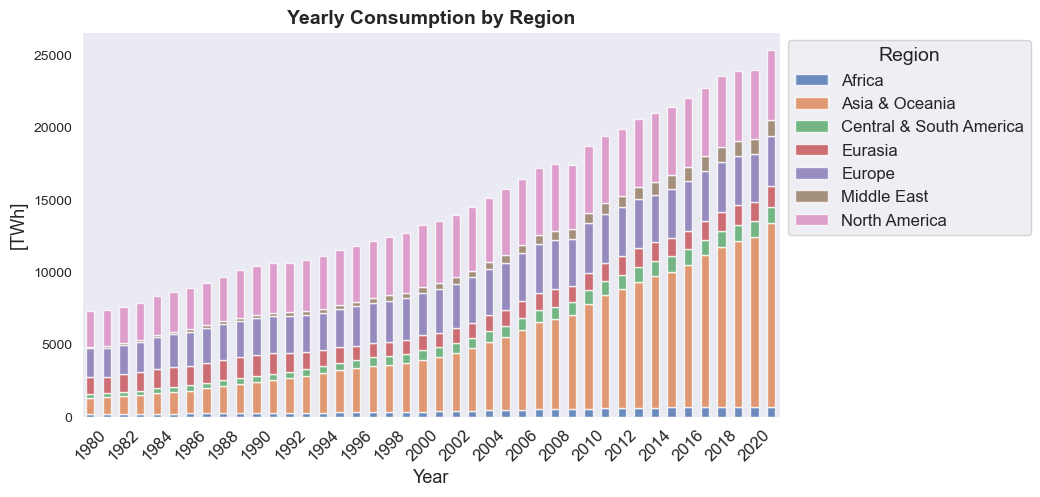

In [158]:
# Calculating the yearly consumption per region

yearly_consumption_by_region = df_processed_final.groupby(['Year', 'Region'])['Net Consumption [TWh]'].sum().unstack()

# Defining custom colors for the bar chart
custom_colors = sns.color_palette("deep")

# Plotting the bar chart using matplotlib
ax = yearly_consumption_by_region.plot(kind='bar', stacked=True, figsize=(9, 5), alpha=0.8, color=custom_colors)

plt.title('Yearly Consumption by Region', fontsize=14, fontweight='bold')

# plt.xticks(list(range(1980, 2021, 2)), rotation=45)
plt.xticks(list(range(0, 42, 2)), rotation=45, fontsize=12)
plt.xlabel('Year', fontsize=13)

plt.yticks(fontsize=10)
plt.ylabel('[TWh]', fontsize=13)

# Customizing the legend
plt.legend(title='Region', title_fontsize='14', fontsize='12', loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

### Yearly Global Generation, Consumption vs Losses

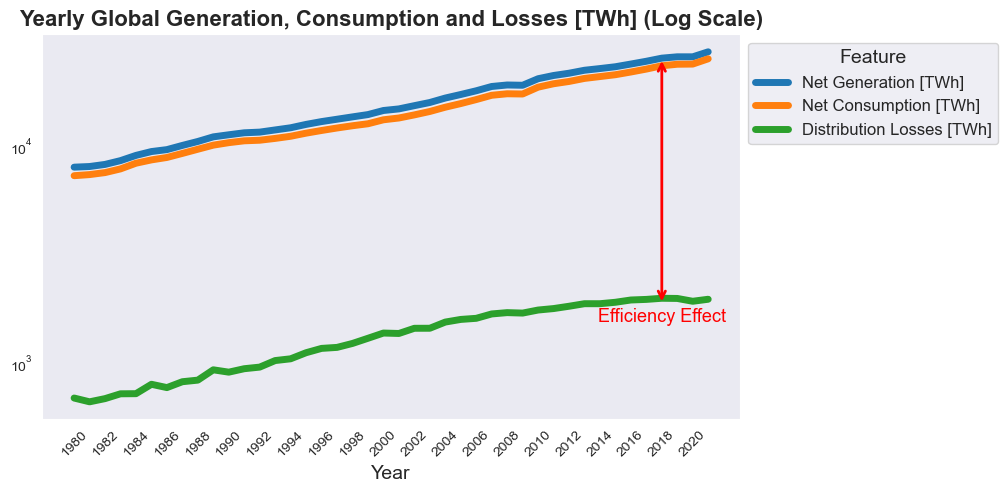

In [161]:
# Calculating yearly global consumption
global_losses_yearly = df_processed_final.groupby('Year')[['Net Generation [TWh]','Net Consumption [TWh]', 'Distribution Losses [TWh]']].sum()

# Plot for yearly global consumption with logarithmic scale
ax = global_losses_yearly.plot(kind='line', figsize=(9,5), lw=5, logy=True)

# Additional formatting
ax.set_title('Yearly Global Generation, Consumption and Losses [TWh] (Log Scale)', fontsize=16, fontweight='bold')
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('', fontsize=14)
ax.set_xticks(list(range(1980, 2021, 2)))
ax.set_xticklabels(list(range(1980, 2021, 2)), rotation=45)

# Customizing the legend
ax.legend(title='Feature', title_fontsize='14', fontsize='12', loc='upper left', bbox_to_anchor=(1, 1))

# # Adding line to highlight the effect of energy efficiency
# plt.axvline(x=2018, color='red', linestyle='--', linewidth=2, label='Efficiency effect', lw=1.5, alpha=0.3)

# Adding a double-arrowed line and text in 2018
arrow_properties = dict(facecolor='red', edgecolor='red', arrowstyle='<->', lw=2)
x_value = 2018
y_value_gen = global_losses_yearly.loc[x_value, 'Net Generation [TWh]']
y_value_losses = global_losses_yearly.loc[x_value, 'Distribution Losses [TWh]']
ax.annotate('Efficiency Effect', xy=(x_value, y_value_gen), xytext=(x_value, y_value_losses-350),
            arrowprops=arrow_properties, fontsize=13, ha='center', va='center', color='red')


# Show the plot
plt.show()


### Electrical Energy Use Per Person

In [295]:
import geopandas as gpd

In [296]:
# Reading a world map GeoDataFrame using geopandas

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world

C:\Users\Admin\AppData\Local\Temp\ipykernel_14040\4159066167.py:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [301]:
# Getting only last years data

df_last_year_data = df_processed_final.loc[df_processed_final['Year'] == 2021][['Country', 'Region', 'Year', 'Net Consumption [TWh]']]

# Converting ['TWh'] to ['kWh']
df_last_year_data['Net Consumption [kWh]'] = df_last_year_data['Net Consumption [TWh]'] * 1000000000
df_last_year_data.head()

Features,Country,Region,Year,Net Consumption [TWh],Net Consumption [kWh]
41,Afghanistan,Asia & Oceania,2021,5.530597,5.530597e+09
83,Albania,Europe,2021,7.415871,7.415871e+09
125,Algeria,Africa,2021,68.663379,6.866338e+10
167,American Samoa,Asia & Oceania,2021,0.155598,1.555981e+08
209,Angola,Africa,2021,14.560491,1.456049e+10


In [302]:
# Merging the readed world dataframe with the dataframe that contains consumption data

merged_data = world.merge(df_last_year_data, left_on='name', right_on='Country', how='right')
merged_data

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Country,Region,Year,Net Consumption [TWh],Net Consumption [kWh]
0,38041754.0,Asia,Afghanistan,AFG,19291.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",Afghanistan,Asia & Oceania,2021,5.530597,5.530597e+09
1,2854191.0,Europe,Albania,ALB,15279.0,"POLYGON ((21.02004 40.84273, 20.99999 40.58000...",Albania,Europe,2021,7.415871,7.415871e+09
2,43053054.0,Africa,Algeria,DZA,171091.0,"POLYGON ((-8.68440 27.39574, -8.66512 27.58948...",Algeria,Africa,2021,68.663379,6.866338e+10
3,NaN,NaN,NaN,NaN,NaN,None,American Samoa,Asia & Oceania,2021,0.155598,1.555981e+08
4,31825295.0,Africa,Angola,AGO,88815.0,"MULTIPOLYGON (((12.99552 -4.78110, 12.63161 -4...",Angola,Africa,2021,14.560491,1.456049e+10
...,...,...,...,...,...,...,...,...,...,...,...
210,NaN,NaN,NaN,NaN,NaN,None,Wake Island,Asia & Oceania,2021,0.000000,0.000000e+00
211,NaN,NaN,NaN,NaN,NaN,None,Western Sahara,Africa,2021,0.000000,0.000000e+00
212,29161922.0,Asia,Yemen,YEM,22581.0,"POLYGON ((52.00001 19.00000, 52.78218 17.34974...",Yemen,Middle East,2021,2.931320,2.931320e+09
213,17861030.0,Africa,Zambia,ZMB,23309.0,"POLYGON ((30.74001 -8.34001, 31.15775 -8.59458...",Zambia,Africa,2021,14.320752,1.432075e+10


In [303]:
merged_data.isnull().sum()

pop_est                  59
continent                59
name                     59
iso_a3                   59
gdp_md_est               59
geometry                 59
Country                   0
Region                    0
Year                      0
Net Consumption [TWh]     0
Net Consumption [kWh]     0
dtype: int64

In [304]:
from fuzzywuzzy import process
from fuzzywuzzy import fuzz

In [305]:
# Creating a list of unique standardized country names from the world dataframe

standardized_country_names = world['name'].tolist()

In [325]:
# Performing fuzzy matching for each country name in df_max_type

def fuzzy_match_country(row):
    match, score = process.extractOne(row['Country'], standardized_country_names, scorer=fuzz.ratio)
    if score >= 65:  # Adjust the threshold as needed
        return match
    else:
        return None
    
df_last_year_data['Matched_Country'] = df_last_year_data.apply(fuzzy_match_country, axis=1)
df_last_year_data

Features,Country,Region,Year,Net Consumption [TWh],Net Consumption [kWh],Matched_Country
41,Afghanistan,Asia & Oceania,2021,5.530597,5.530597e+09,Afghanistan
83,Albania,Europe,2021,7.415871,7.415871e+09,Albania
125,Algeria,Africa,2021,68.663379,6.866338e+10,Algeria
167,American Samoa,Asia & Oceania,2021,0.155598,1.555981e+08,None
209,Angola,Africa,2021,14.560491,1.456049e+10,Angola
...,...,...,...,...,...,...
9491,Wake Island,Asia & Oceania,2021,0.000000,0.000000e+00,None
9533,Western Sahara,Africa,2021,0.000000,0.000000e+00,W. Sahara
9575,Yemen,Middle East,2021,2.931320,2.931320e+09,Yemen
9617,Zambia,Africa,2021,14.320752,1.432075e+10,Zambia


In [326]:
# Merging the readed world dataframe with the dataframe that contains consumption data

merged_data_fuzzy = world.merge(df_last_year_data, left_on='name', right_on='Matched_Country', how='right')

In [344]:
merged_data_fuzzy = merged_data_fuzzy[~merged_data_fuzzy['pop_est'].isna() == True]
merged_data_fuzzy = merged_data_fuzzy.loc[merged_data_fuzzy['pop_est']>1000]
merged_data_fuzzy = merged_data_fuzzy[~merged_data_fuzzy['Country'].isin(['Iceland'])]

In [345]:
merged_data_fuzzy['Electrical Energy Use Per Person'] = (merged_data_fuzzy['Net Consumption [kWh]'] / merged_data_fuzzy['pop_est'])

In [346]:
merged_data_fuzzy.isnull().sum()

pop_est                             0
continent                           0
name                                0
iso_a3                              0
gdp_md_est                          0
geometry                            0
Country                             0
Region                              0
Year                                0
Net Consumption [TWh]               0
Net Consumption [kWh]               0
Matched_Country                     0
Electrical Energy Use Per Person    0
dtype: int64

In [347]:
merged_data_fuzzy[merged_data_fuzzy['Country'].isnull() == False]['Country'].count()

179

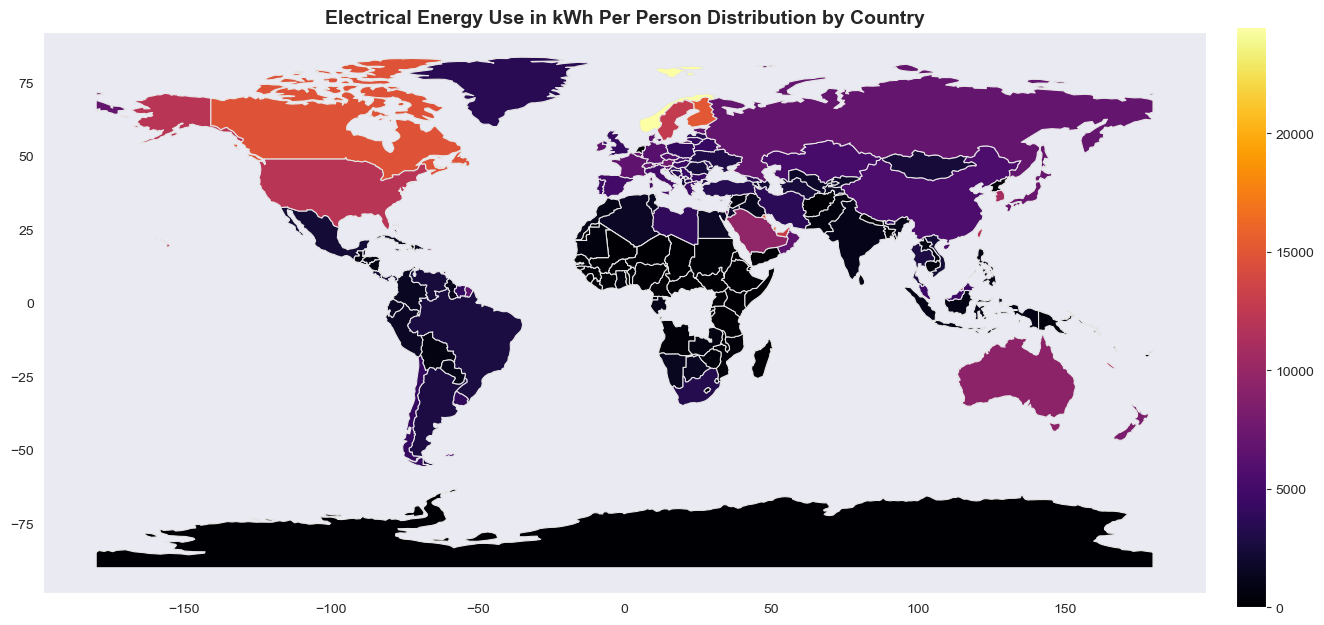

In [348]:
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Choose a colormap and normalize the data
cmap = plt.get_cmap('inferno')
norm = Normalize(vmin=merged_data_fuzzy['Electrical Energy Use Per Person'].min(),
                 vmax=merged_data_fuzzy['Electrical Energy Use Per Person'].max())

# Plot the map using the specified colormap and normalization
merged_data_fuzzy.plot(column='Electrical Energy Use Per Person', cmap=cmap, norm=norm,
                       linewidth=0.8, ax=ax, edgecolor='0.9')

plt.title("Electrical Energy Use in kWh Per Person Distribution by Country", fontsize=14, fontweight = 'bold')

# Add a color bar
cax = fig.add_axes([0.92, 0.2, 0.02, 0.58])  # [left, bottom, width, height]
cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=cmap, norm=norm), cax=cax, orientation='vertical')


plt.show()
